In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import os
print(os.listdir("/content/drive/MyDrive/ck+dataset"))


# Any results you write to the current directory are saved as output.

['CK+48']


In [3]:
data_path = '/content/drive/MyDrive/ck+dataset/CK+48'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-disgust

Loaded the images of dataset-contempt

Loaded the images of dataset-anger

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise

Loaded the images of dataset-fear

Loaded the images of dataset-happy



(981, 48, 48, 3)

In [4]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]



In [5]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test

In [6]:
X_test.shape

(148, 48, 48, 3)

In [8]:
input_shape=(48,48,3)

model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [9]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 activation (Activation)     (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        9

True

In [12]:
# hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test)) 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/CK_Scratch_model.h5') 


In [ ]:
def plot_model_history(model_history):
    # Plotting the accuracies
    dict_hist = model_history.history
    list_ep = [i for i in range(1, len(dict_hist['accuracy']) + 1)]
    plt.figure(figsize = (8, 8))
    plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
    plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show() 

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
def check_model_performance(model, testing_data):
    test_pred = model.predict(testing_data)
    test_pred = np.argmax(test_pred, axis = -1)
    y_true_labels = y_test
    y_true_labels = np.argmax(y_true_labels, axis = -1)
    print(classification_report(y_true_labels, test_pred))
    cm = confusion_matrix(y_true_labels, test_pred)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.0f') 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Scratch model performance on Ck+48 dataset")
    plt.show()  



5/5 [==============================] - 0s 31ms/step
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.30      0.43      0.35         7
           2       0.91      1.00      0.96        32
           3       0.83      1.00      0.91        10
           4       0.76      0.83      0.79        23
           5       0.11      0.11      0.11         9
           6       0.95      0.87      0.91        47

    accuracy                           0.80       148
   macro avg       0.68      0.69      0.68       148
weighted avg       0.81      0.80      0.80       148



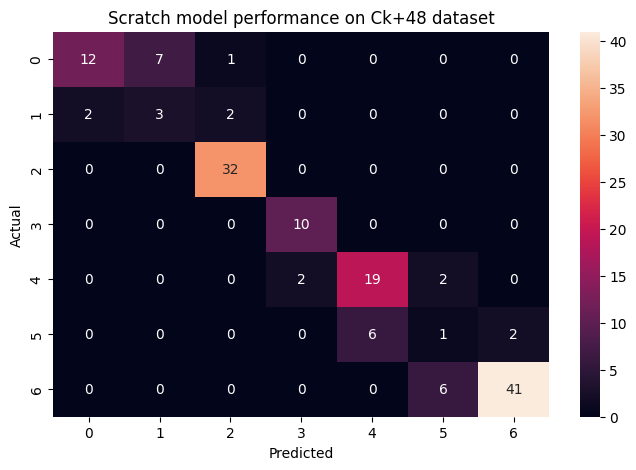

In [14]:
# plot_model_history(hist)
check_model_performance(model, X_test)

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))

# print(model.predict_classes(test_image))
predict_x = model.predict(test_image)
classes_x = np.argmax(predict_x,axis = 1)
print(classes_x)

print(y_test[0:1])

# # res = model.predict_classes(X_test[9:18])
# predict1_x = model.predict(X_test[9:18])
# res = np.argmax(predict1_x,axis = 1)

# # print(f"x_test {X_test}")

# plt.figure(figsize=(10, 10))

# for i in range(0, 9):
#     plt.subplot(330 + 1 + i)
#     plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
#     plt.gca().get_xaxis().set_ticks([])
#     plt.gca().get_yaxis().set_ticks([])
#     plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# # show the plot
# plt.show()

Test Loss: 0.7287298440933228
Test accuracy: 0.7972972989082336
(1, 48, 48, 3)
1/1 [==============================] - 0s 79ms/step
[[0.63308865 0.319172   0.02346655 0.00510919 0.01011445 0.00237731
  0.00667186]]
1/1 [==============================] - 0s 99ms/step
[0]
[[1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# visualizing losses and accuracy
%matplotlib inline

print(hist.history)
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))
plt.figure(figsize = (8, 5))
plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()

plt.figure(figsize = (8, 5))
plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()





In [34]:
from tensorflow.keras.applications import MobileNetV3Small
def mobileNet_model():
  model = Sequential()
  model.add(MobileNetV3Small(include_top=False, weights=None, input_tensor=None,input_shape=(48,48,3), pooling=None))
  model.add(GlobalAveragePooling2D())
  model.add(Flatten())
  model.add(Dense(256, activation='relu', name="fc_3"))
  model.add(Dense(128, activation='relu', name="fc_4"))
  model.add(Dense(64, activation='relu', name="fc_5"))
  model.add(Dense(32, activation='relu', name="fc_6"))
  model.add(Dense(16, activation='relu', name="fc_7"))
  model.add(Dense(7, activation='softmax', name='output'))

  return model

model_mobileNet=mobileNet_model()
model_mobileNet.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_48 (Function  (None, 1, 1, 1024)       3228864   
 al)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 fc_3 (Dense)                (None, 256)               262400    
                                                                 
 fc_4 (Dense)                (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 output (Dense)              (None, 7)                 903       
                                                      

In [33]:
model_mobileNet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])
history_model_mobileNet = model_mobileNet.fit(X_train, y_train, 
                              epochs=50, 
                              validation_data=(X_test, y_test), 
                              verbose=1)  
# hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test)) 


Epoch 1/50
27/27 [==============================] - 30s 812ms/step - loss: 1.9046 - accuracy: 0.2689 - precision_9: 0.3663 - recall_9: 0.0444 - val_loss: 1.9272 - val_accuracy: 0.1554 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 17s 645ms/step - loss: 1.7734 - accuracy: 0.3289 - precision_9: 0.5856 - recall_9: 0.0780 - val_loss: 1.9302 - val_accuracy: 0.1554 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 17s 628ms/step - loss: 1.5252 - accuracy: 0.4562 - precision_9: 0.6790 - recall_9: 0.1981 - val_loss: 1.9272 - val_accuracy: 0.1554 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 17s 621ms/step - loss: 1.2919 - accuracy: 0.5762 - precision_9: 0.7246 - recall_9: 0.3601 - val_loss: 1.9224 - val_accuracy: 0.1554 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 5/50
27/27 [==================

5/5 [==============================] - 1s 65ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.14      1.00      0.24        20
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        47

    accuracy                           0.14       148
   macro avg       0.02      0.14      0.03       148
weighted avg       0.02      0.14      0.03       148



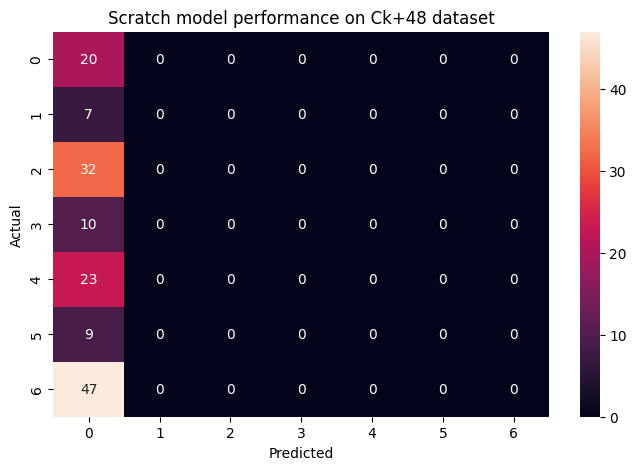

In [36]:
# performace of resnet model
# plot_model_history(history_model_resnet)
check_model_performance(model_mobileNet,X_test)

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load pre-trained CK+ model 
# model = load_model('ckplus_model.h5') 

# Define emotion labels 
emotion_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

def predict_emotion(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
        frame = cv2.resize(frame, (48, 48))
        frames.append(frame)
    cap.release()
    frames = np.array(frames)
    frames = frames.reshape(-1, 48, 48, 1)
    frames = np.concatenate([frames, frames, frames], axis=-1) / 255.0
    predictions = model.predict(frames)
    avg_predictions = np.mean(predictions, axis=0)
    # emotion_idx = np.argmax(avg_predictions)
    # if emotion_idx < len(emotion_labels):
    #     emotion_label = emotion_labels[emotion_idx]
    # else:
    #     emotion_label = "Unknown"
    # return emotion_label
    return predictions

emotions = predict_emotion('/content/SaveInsta.App - 3082106782700544756.mp4')


In [ ]:
import collections
print(emotions)

# using Counter to find frequency of elements
# frequency = collections.Counter(emotions)

# printing the frequency
# print(dict(frequency))

In [ ]:
model.save('./CK+48_Scratch.h5') 


In [ ]:
model.save('/content/drive/MyDrive/CK_Scratch_model.h5') 
